**1. Regression Tree**

•	Import the necessary libraries (e.g., pandas, scikit-learn).
•	Load a regression dataset (e.g., Boston Housing dataset).
•	Preprocess the data (handle missing values, normalize/standardize features if necessary).
•	Implement a Regression Tree algorithm using a recursive approach.
•	Train the regression tree on the dataset.
•	Evaluate the performance of the regression tree using metrics like Mean Squared Error (MSE) or R-squared.
•	Visualize the regression tree.
•	Data set

 a) https://www.kaggle.com/datasets/hellbuoy/car-price-prediction


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the dataset from cars.csv file
df = pd.read_csv("cars.csv")

# Check for null values
print("Null values in each column:\n", df.isnull().sum())

# Handle missing values (if any)
df = df.dropna()  # Drop rows with missing values


Null values in each column:
 car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


In [ ]:

# Convert categorical variables to dummy/indicator variables
df = pd.get_dummies(df)

# Normalize/standardize numeric features
scaler = StandardScaler()
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_features] = scaler.fit_transform(df[numeric_features])


In [ ]:

# Split the data into features and target variable
X = df.drop("price", axis=1)
y = df["price"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Implement a Regression Tree algorithm using a recursive approach
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)


DecisionTreeRegressor()

Mean Squared Error: 0.1176690680444058
R-squared: 0.8454303863588393


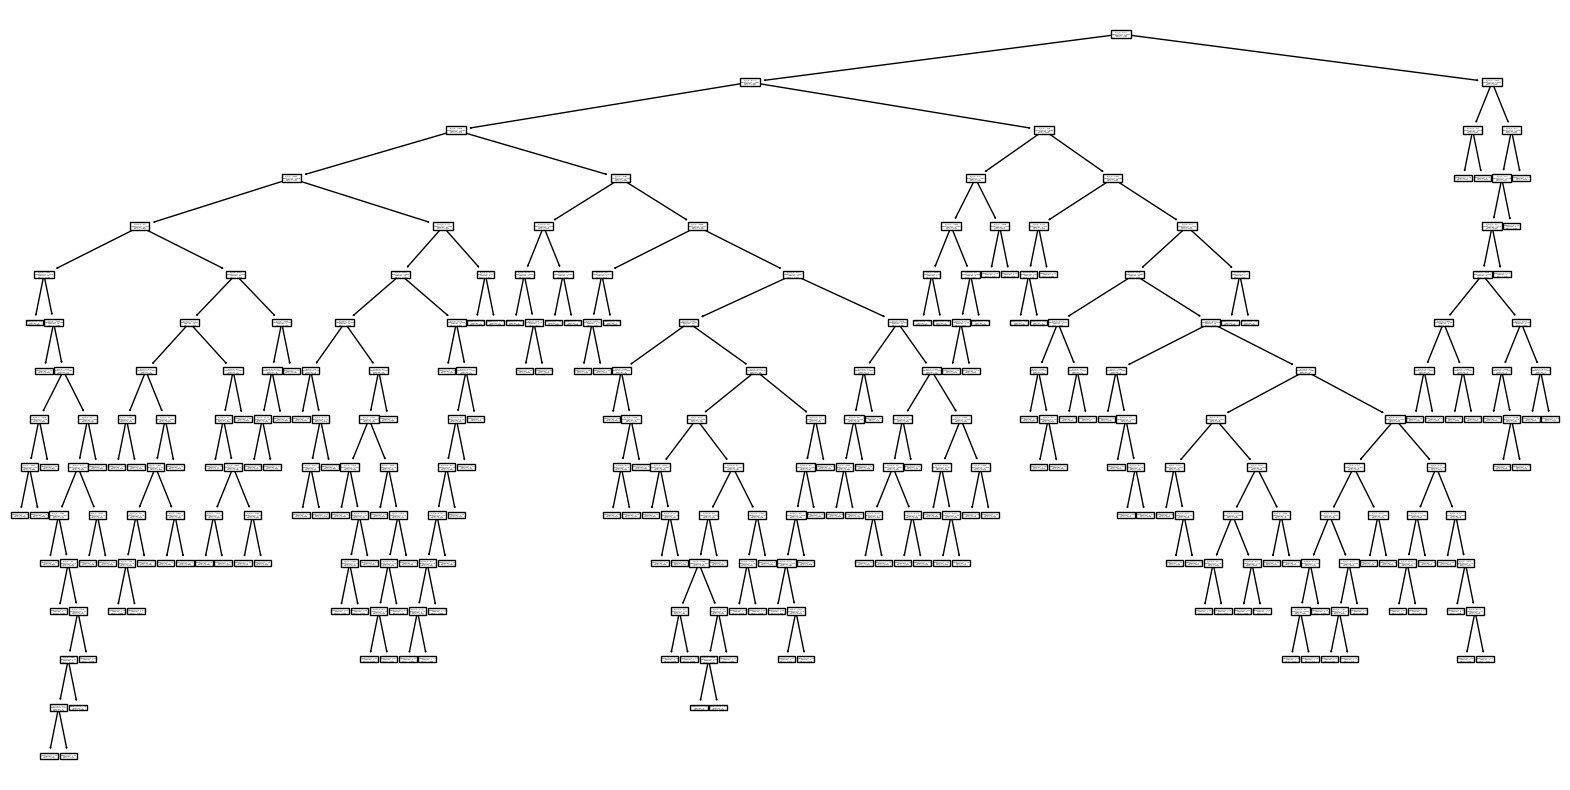

In [ ]:

# Evaluate the performance of the regression tree
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Visualize the regression tree
plt.figure(figsize=(20,10))
tree.plot_tree(regressor)
plt.show()


1. **Regression** **Tree**
• Import the necessary libraries (e.g., pandas, scikit-learn). • Load a regression dataset (e.g., Boston Housing dataset). • Preprocess the data (handle missing values, normalize/standardize features if necessary). • Implement a Regression Tree algorithm using a recursive approach. • Train the regression tree on the dataset. • Evaluate the performance of the regression tree using metrics like Mean Squared Error (MSE) or R-squared. • Visualize the regression tree. • Data set

b) https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression

In [16]:
# Load the dataset from students.csv file
df_students = pd.read_csv("students.csv")

# Check for null values
print("Null values in each column:\n", df_students.isnull().sum())

# Handle missing values (if any)
df_students = df_students.dropna()  # Drop rows with missing values

# Convert categorical variables to dummy/indicator variables
df_students = pd.get_dummies(df_students)

# Normalize/standardize numeric features
numeric_features_students = df_students.select_dtypes(include=['float64', 'int64']).columns
df_students[numeric_features_students] = scaler.fit_transform(df_students[numeric_features_students])

# Split the data into features and target variable
X_students = df_students.drop("Performance Index", axis=1)  # Replace 'target_variable' with the actual target column name
y_students = df_students["Performance Index"]  # Replace 'target_variable' with the actual target column name



Null values in each column:
 Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64


In [41]:

# Split the data into training and testing sets
X_train_students, X_test_students, y_train_students, y_test_students = train_test_split(X_students, y_students, test_size=0.2)

# Implement a Regression Tree algorithm using a recursive approach
regressor_students = DecisionTreeRegressor()
regressor_students.fit(X_train_students, y_train_students)

# Evaluate the performance of the regression tree
y_pred_students = regressor_students.predict(X_test_students)
mse_students = mean_squared_error(y_test_students, y_pred_students)
r2_students = r2_score(y_test_students, y_pred_students)

print(f"Mean Squared Error (students): {mse_students}")
print(f"R-squared (students): {r2_students}")


Mean Squared Error (students): 0.025576054589478453
R-squared (students): 0.9754229970440997


In [ ]:

# Visualize the regression tree
plt.figure(figsize=(20,10))
tree.plot_tree(regressor_students)
plt.show()

**2.	Perform CART  Algorithm in last lab data set and Perform ROC and  AUC  analysis**

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
data = pd.read_csv('lastlab.csv')

# Separate features and target variable
X = data.drop('Target', axis=1)
y = data['Target']

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Predict probabilities
y_prob = pipeline.predict_proba(X_test)


In [45]:

# Get unique classes in the training data
classes = pipeline.classes_

# Binarize the output for ROC curve calculation
y_test_binarized = label_binarize(y_test, classes=classes)
n_classes = y_test_binarized.shape[1]

# Ensure y_prob has probabilities for all classes
if y_prob.shape[1] != n_classes:
    # If there are fewer columns than classes, we need to handle this
    # Create an array with zeros for missing class probabilities
    y_prob = np.hstack([
        y_prob,
        np.zeros((y_prob.shape[0], n_classes - y_prob.shape[1]))
    ])


In [46]:

# Compute ROC curve and ROC AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

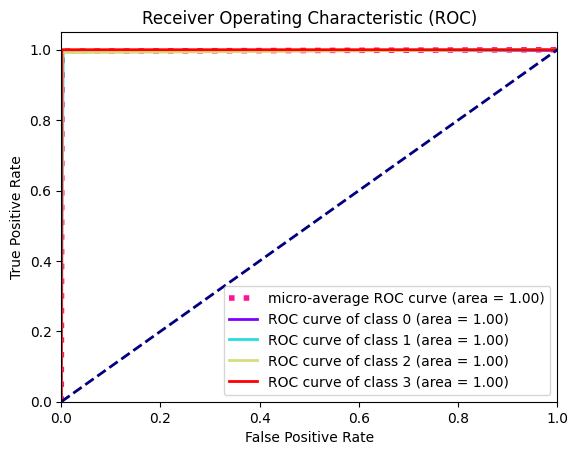

In [47]:

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"], label='micro-average ROC curve (area = %0.2f)' % roc_auc["micro"], color='deeppink', linestyle=':', linewidth=4)

colors = plt.cm.rainbow(np.linspace(0, 1, n_classes))
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class %d (area = %0.2f)' % (i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()
